In [1]:
from numpy.random import uniform, randint
import numpy as np
import pandas as pd
import altair as alt

# Exercise 1

Recall that $n!$ is read as "$n$ factorial" and defined as $n! = n \times (n-1) \times ... \times 2 \times 1$

There are functions to compute this in various modules, but let's write our own version as an exercise.

In particular, write a function `factorial` such that `factorial(n)` returns $n!$ for any positive integer $n$

In [2]:
def factorial(n: int) -> int:
    try:
        assert isinstance(n, int)
    except AssertionError:
        print(f'invalid input type {type(n)}, exiting')
        return None
    if n <= 0:
        print('n must be positive integer')
        return None
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)

In [3]:
print(factorial(3.7))
print(factorial(-5))
print(factorial(0))
print(factorial(1))
print(factorial(3))

invalid input type <class 'float'>, exiting
None
n must be positive integer
None
n must be positive integer
None
1
6


# Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $Y~Bin(n,p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$

Without any imports besides `from numpy.random import uniform` write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$

Hint: if $U$ is uniform on $(0,1)$ and $p \in (0,1)$, then the expression `U < p` evaluates to `True` with probability $p$

In [4]:
def binomial_rv(n: int, p: float) -> int:
    try:
        assert isinstance(n, int)
        assert n > 0
    except AssertionError:
        print('n must be a positive integer')
        return None
    try:
        assert isinstance(p, float)
        assert p >= 0
        assert p <= 1
    except AssertionError:
        print('p must be a float between 0 and 1 inclusive')
        return None
    successes = 0
    for _ in range(n):
        draw = uniform()
        if draw < p:
            successes += 1
    return successes

In [5]:
for _ in range(5):
    n = randint(0, 100)
    p = uniform()
    print(f'n: {n}')
    print(f'p: {p}')
    print(binomial_rv(n, p))

n: 1
p: 0.4995351987625749
1
n: 18
p: 0.9764612518546607
16
n: 97
p: 0.6930336251732602
69
n: 83
p: 0.04530935585548557
7
n: 20
p: 0.28899065096793053
7


# Exercise 3

Compute an approximation to $\pi$ using Monte Carlo. Use no imports besides `import numpy as np`

Your hints are as follows:

- If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area under $B$

- If $U_1,...,U_n$ are iid copies of $U$, then, as $n$ gets large, the fraction that fall in $B$ converges to the probability of landing in $B$

- For a circle, $area = \pi \times radius^2$

Ok, reason this out. Can think of $U$ as drawing a point $(x,y)$ where $0 <= x, y <= 1$ so that's a point in the unit square. A circle with radius 0.5 will cover an area $B = \pi \times 0.5^2$ so $\frac{B}{0.5^2} = \pi$. Geometry is clearly my strong suit. So now I just have to figure out how to determine if my $x, y$ coordinates are inside the unit circle.
Ok, $x, y$ coordinates create a line from the origin and form a right triangle with length $x$ and height $y$. Thanks to my old pal Pythagoras I know $c^2 = a^2 + b^2$ So if I take my x and y, square and sum them, then take the square root of that, I'll have the length of the hypotenuse. If that's greater than 1 it's outside the unit circle. Easy!

In [6]:
def monte_pi(trials):
    successes = 0
    for _ in range(trials):
        x, y = uniform(size=2)
        hyp = np.sqrt(x**2 + y**2)
        if hyp <= 1:
            successes += 1
    pi_est = (successes / trials) / (0.5**2)
    return pi_est


In [7]:
n = 1
while n < 1000000:
    print(monte_pi(n))
    n = n * 10

0.0
3.6
3.36
3.212
3.1244
3.14376


# Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times

- If 3 consecutive heads occur one or more times within this sequence, pay one dollar

- If not, pay nothing

Use no imports besided `from numpy.random import uniform`

In [8]:
def payout():
    consecutive_heads = 0
    for _ in range(10):
        flip = uniform()
        if flip > 0.5:
            consecutive_heads += 1
        else:
            consecutive_heads = 0
        if consecutive_heads == 3:
            return 1
    return 0

In [9]:
for _ in range(5):
    print(payout())

0
1
1
1
1


# Exercise 5

Your next task it to simulate and plot the correlated time series

$x_{t+1} = \alpha x_t + \epsilon_{t+1}$ where $x_0 = 0$ and $t = 0,...,T$

The sequence of shocks $\{\epsilon_t\}$ is assumed to be iid and standard normal

In your solution, restrict your import statements to

```python
import numpy as np
import matplotlib.pyplot as plt
```

Set $T = 200$ and $\alpha =0.9$

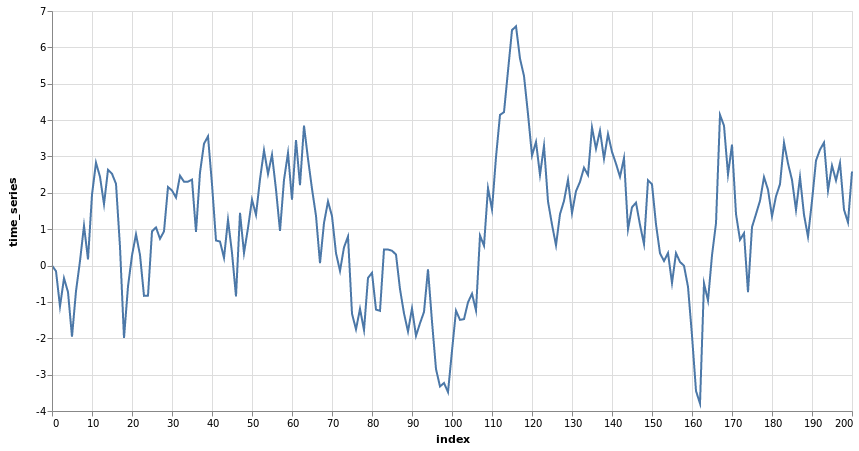

In [10]:
def corr_time(t=200, a=0.9):
    corr_series = [0]
    for i in range(t):
        obs = a * corr_series[i] + np.random.randn()
        corr_series.append(obs)
    return corr_series
    
data = (
    pd.DataFrame(corr_time())
    .rename(columns={0: 'time_series'})
    .reset_index()
)

chart = (
    alt.Chart(data)
    .mark_line()
    .encode(y='time_series:Q', x='index:Q')
    .properties(width=800, height=400)
)
chart

# Exercise 6

To do the next exercise, you will ned to know how to produce a plot legend

Now, starting with your solution to exercise 5, plot 3 simulated time series, one for each of the cases $\alpha=0$, $\alpha=0.8$ and $\alpha=0.98$

(The figure nicely illustrates how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities.)

Use a `for` loop to step through the $\alpha$ values

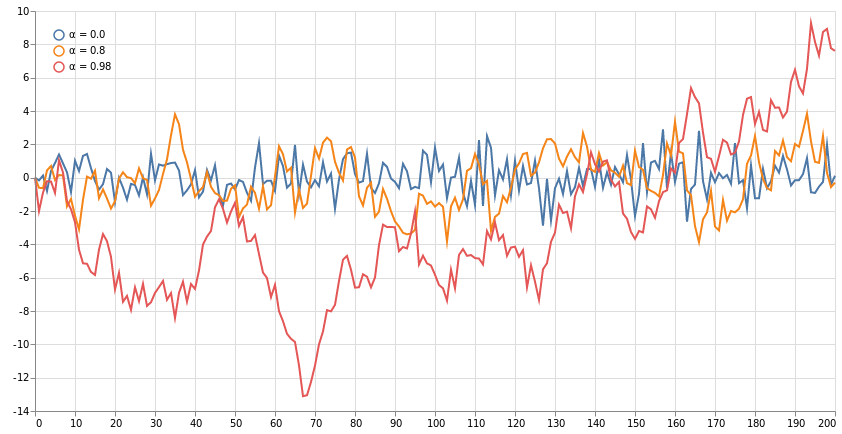

In [11]:
data = (
    pd.DataFrame({u"\u03B1" + ' = ' + str(param): corr_time(a=param) for param in [0.0, 0.8, 0.98]})
    .reset_index()
    .melt(id_vars=['index'])
)
chart = (
    alt.Chart(data)
    .mark_line()
    .encode(
        x=alt.X('index:Q', title=''),
        y=alt.Y('value:Q', title=''),
        color=alt.Color('variable:N', legend=alt.Legend(title='', orient='top-left'))
    )
    .properties(width=800, height=400)
)
chart